:::{#fig-logo}

![](https://saturncloud.io/images/glossary/pyshark.webp){width=50% .lightbox}

Pyspark Logo
:::

# What is PySpark?

It is the `Python` API for `Spark`.
It's the bridge between Python code and the distributed computing engine of `Spark`.

This means you can write your data processing tasks in familiar `Python` syntax, while `Spark` handles the heavy lifting of parallelizing and executing them across multiple machines.

`PySpark` can handle large datasets with easiness, thanks to its distributed architecture. PySpark splits the work and gets it done efficiently.

`PySpark` offers tools like `SparkSQL` for SQL-like queries and `MLlib` for machine learning.

`PySpark` syntax is similar to `Pandas`. Its APIs are designed to be intuitive and leverage our existing knowledge.

# Why Choose PySpark?

- **Speed**: Spark's in-memory processing and distributed architecture make it significantly faster than traditional data processing frameworks like Hadoop MapReduce, especially for iterative computations.

- **Ease of Use**: PySpark integrates seamlessly with Python, a language known for its simplicity and readability. This makes it easier for data scientists and analysts to learn and use.

- **Versatility**: PySpark supports a wide range of data processing tasks, including batch processing, stream processing, machine learning, and graph processing.

- **Scalability**: Spark can scale from small datasets on a single machine to massive datasets distributed across hundreds or thousands of machines.

- **Rich Ecosystem**: PySpark benefits from the rich ecosystem of Python libraries, including popular tools like Pandas, NumPy, and Scikit-learn, allowing you to combine them with Spark's distributed computing power.

# Key Features

- RDDs (Resilient Distributed Datasets): The fundamental data structure in Spark. RDDs are immutable, distributed collections of data that can be processed in parallel.

- DataFrames: A higher-level abstraction over RDDs, similar to tables in a relational database. DataFrames provide a more structured way to work with data and offer optimized performance.

- Spark SQL: Allows you to use SQL queries to process data in Spark. This makes it easier for those familiar with SQL to work with large datasets.

- MLlib (Machine Learning Library): Provides a wide range of machine learning algorithms for tasks like classification, regression, clustering, and collaborative filtering.

- Spark Streaming: Enables real-time processing of streaming data. This is useful for applications like fraud detection, log analysis, and social media monitoring.

- GraphX: A library for graph processing, allowing you to perform operations on large-scale graphs.

# What can you do with PySpark?

- **Data Ingestion & Cleaning**

Read and process massive datasets from various sources, including text files, databases, and streaming feeds.
Clean and prepare your data for analysis with ease.

- **Exploratory Data Analysis**

Analyze large datasets using familiar Python functions and libraries. 
Uncover trends, patterns, and relationships hidden within your data.

- **Machine Learning**

Build and train machine learning models on vast datasets using PySpark's MLlib library.
Leverage powerful algorithms for classification, regression, clustering, and more.

- **Streaming Analytics**

Gain insights from real-time data streams with PySpark's Structured Streaming capabilities.
React to events as they happen and make data-driven decisions in real-time.

# Environment settings

In [1]:
# Import libraries
import jdk
import findspark
findspark.init()
findspark.find()
import pyspark
from pyspark.sql import SparkSession  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create session
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/03 10:59:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Basic Operations

We will show some basic manipulation operations with Pyspark, like reading datasets and doing some operations.

### Read datasets

In [3]:
# Read json
df = spark.read.json('../Datasets/people.json')

### Preview datasets

In [5]:
# Print dataframe
df.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



### View data types

In [6]:
# Print schema
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



### Select columns or fields

In [7]:
# Show columns
df.columns

['age', 'name']

### Descriptive Statistics of dataset

In [8]:
# Get descriptive stats
df.describe().show()

+-------+------------------+-------+
|summary|               age|   name|
+-------+------------------+-------+
|  count|                 2|      3|
|   mean|              24.5|   NULL|
| stddev|7.7781745930520225|   NULL|
|    min|                19|   Andy|
|    max|                30|Michael|
+-------+------------------+-------+



### Changing data types

In [9]:
# Import data types
from pyspark.sql.types import (StructField, StringType, IntegerType, StructType)

In [10]:
# Create schema with new data types
data_schema = [StructField('age', IntegerType(), True),
              StructField('name', StringType(), True)]

In [11]:
# Save new schema
final_struct = StructType(fields=data_schema)

In [12]:
# Read json with new schema
df = spark.read.json('../Datasets/people.json', schema=final_struct)

In [13]:
# Show new schema
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



### Selecting columns

In [14]:
# Show first rows
df.head(5)

[Row(age=None, name='Michael'),
 Row(age=30, name='Andy'),
 Row(age=19, name='Justin')]

In [15]:
# Select a column
df.select('age').show()

+----+
| age|
+----+
|NULL|
|  30|
|  19|
+----+



In [16]:
# Select several columns
df.select(['age','name']).show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



### Creating new columns

In [17]:
# Create new column from an existing one
df.withColumn('age2', df['age']+5).show()

+----+-------+----+
| age|   name|age2|
+----+-------+----+
|NULL|Michael|NULL|
|  30|   Andy|  35|
|  19| Justin|  24|
+----+-------+----+



### Rename colums

In [18]:
# Rename an existing column
df.withColumnRenamed('age','new_age').show()

+-------+-------+
|new_age|   name|
+-------+-------+
|   NULL|Michael|
|     30|   Andy|
|     19| Justin|
+-------+-------+



### Using SQL

In [19]:
# Create SQL view
df.createOrReplaceTempView('people')

In [20]:
# Execute sql query from above view
spark.sql("SELECT * FROM people WHERE age is not null").show()

+---+------+
|age|  name|
+---+------+
| 30|  Andy|
| 19|Justin|
+---+------+



### Filtering datasets

In [21]:
app = spark.read.csv('../Datasets/appl_stock.csv', header=True, inferSchema=True)

In [22]:
app.head(5)

[Row(Date=datetime.date(2010, 1, 4), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039),
 Row(Date=datetime.date(2010, 1, 5), Open=214.599998, High=215.589994, Low=213.249994, Close=214.379993, Volume=150476200, Adj Close=27.774976000000002),
 Row(Date=datetime.date(2010, 1, 6), Open=214.379993, High=215.23, Low=210.750004, Close=210.969995, Volume=138040000, Adj Close=27.333178000000004),
 Row(Date=datetime.date(2010, 1, 7), Open=211.75, High=212.000006, Low=209.050005, Close=210.58, Volume=119282800, Adj Close=27.28265),
 Row(Date=datetime.date(2010, 1, 8), Open=210.299994, High=212.000006, Low=209.06000500000002, Close=211.98000499999998, Volume=111902700, Adj Close=27.464034)]

### Filtering with SQL-like format

In [23]:
# Filter by a column and select what to show
app.filter('Close < 500').select(['Open','Close']).head(5)

[Row(Open=213.429998, Close=214.009998),
 Row(Open=214.599998, Close=214.379993),
 Row(Open=214.379993, Close=210.969995),
 Row(Open=211.75, Close=210.58),
 Row(Open=210.299994, Close=211.98000499999998)]

### Filtering with Pythonic format

In [24]:
app.filter(app['Close'] < 500).select(['Open','Close']).head(5)

[Row(Open=213.429998, Close=214.009998),
 Row(Open=214.599998, Close=214.379993),
 Row(Open=214.379993, Close=210.969995),
 Row(Open=211.75, Close=210.58),
 Row(Open=210.299994, Close=211.98000499999998)]

In [25]:
# Filter with several conditions
app.filter(
    (app['Close']<200)
    & (app['Open']>200)
).head(5)

[Row(Date=datetime.date(2010, 1, 22), Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401),
 Row(Date=datetime.date(2010, 1, 28), Open=204.930004, High=205.500004, Low=198.699995, Close=199.289995, Volume=293375600, Adj Close=25.819922000000002),
 Row(Date=datetime.date(2010, 1, 29), Open=201.079996, High=202.199995, Low=190.250002, Close=192.060003, Volume=311488100, Adj Close=24.883208)]

In [26]:
# Show filtered results as a dictionary
result = app.filter(app['Low']==197.16).collect()

In [27]:
result[0].asDict('Volume')

{'Date': datetime.date(2010, 1, 22),
 'Open': 206.78000600000001,
 'High': 207.499996,
 'Low': 197.16,
 'Close': 197.75,
 'Volume': 220441900,
 'Adj Close': 25.620401}

### Reading datasets with header and inferred schema

In [28]:
sales = spark.read.csv('../Datasets/sales_info.csv', header=True, inferSchema=True)

In [29]:
sales.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa|243.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [30]:
sales.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



### Grouping basics

In [31]:
sales.groupBy('Company').mean().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



In [32]:
sales.groupBy('Company').agg({'Sales':'max'}).show()

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+



### Getting unique values, standard deviation and rounding numbers

In [33]:
from pyspark.sql.functions import countDistinct, avg, stddev, format_number

In [34]:
sales.select(countDistinct('Sales')).show()

+---------------------+
|count(DISTINCT Sales)|
+---------------------+
|                   11|
+---------------------+



In [35]:
sales.select(avg('Sales').alias('avg_sales')).show()

+-----------------+
|        avg_sales|
+-----------------+
|360.5833333333333|
+-----------------+



In [36]:
sales_std = sales.select(stddev('Sales').alias('std_dev'))
sales_std.select(format_number('std_dev',2).alias('std')).show()

+------+
|   std|
+------+
|250.09|
+------+



### Ordering data

In [37]:
sales.orderBy('Sales').show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+



In [38]:
# Order descending
sales.orderBy(sales['Sales'].desc()).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|     FB|   Carl|870.0|
|   APPL|   Mike|750.0|
|   MSFT|   Tina|600.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   GOOG|  Frank|340.0|
|   APPL|   John|250.0|
|   MSFT|Vanessa|243.0|
|   GOOG|    Sam|200.0|
|   APPL|  Linda|130.0|
|   MSFT|    Amy|124.0|
|   GOOG|Charlie|120.0|
+-------+-------+-----+



### Dealing with null values

In [39]:
df1 = spark.read.csv('../Datasets/ContainsNull.csv', header=True, inferSchema=True)

In [40]:
df1.show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



### Selecting nonnull values

In [41]:
df1.na.drop().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [42]:
df1.na.drop(thresh=2).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [43]:
df1.na.drop(how='all', subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



### Substituting null values

In [44]:
df1.na.fill('Nan').show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2|  Nan| NULL|
|emp3|  Nan|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [45]:
df1.na.fill(0).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|  0.0|
|emp2| NULL|  0.0|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [46]:
from pyspark.sql.functions import mean

In [47]:
mean_val = df1.select(mean(df1['Sales'])).collect()

In [48]:
mean_sales = mean_val[0][0]

In [49]:
df1.na.fill(mean_sales, ['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|400.5|
|emp2| NULL|400.5|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



### Working with datetimes

In [50]:
from pyspark.sql.functions import dayofmonth, hour, dayofyear, month, year, weekofyear, format_number, date_format

In [51]:
app.select(dayofmonth(app['Date'])).head(5)

[Row(dayofmonth(Date)=4),
 Row(dayofmonth(Date)=5),
 Row(dayofmonth(Date)=6),
 Row(dayofmonth(Date)=7),
 Row(dayofmonth(Date)=8)]

In [52]:
app.withColumn('year', year(app['Date'])).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|
|2010-01-11|212.

In [53]:
app_y = app.withColumn('year', year(app['Date']))

In [54]:
app_y.groupBy('year').mean().show()

+----+------------------+------------------+------------------+------------------+--------------------+------------------+---------+
|year|         avg(Open)|         avg(High)|          avg(Low)|        avg(Close)|         avg(Volume)|    avg(Adj Close)|avg(year)|
+----+------------------+------------------+------------------+------------------+--------------------+------------------+---------+
|2015|120.17575393253965|121.24452385714291| 118.8630954325397|120.03999980555547|  5.18378869047619E7|115.96740080555561|   2015.0|
|2013| 473.1281355634922| 477.6389272301587|468.24710264682557| 472.6348802857143|          1.016087E8| 62.61798788492063|   2013.0|
|2014| 295.1426195357143|297.56103184523823| 292.9949599801587| 295.4023416507935| 6.315273055555555E7| 87.63583323809523|   2014.0|
|2012|     576.652720788| 581.8254008040001| 569.9211606079999| 576.0497195640002|       1.319642044E8| 74.81383696800002|   2012.0|
|2016|104.50777772619044| 105.4271825436508|103.69027771825397|104.60

In [55]:
new = app_y.groupBy('year').mean()

In [56]:
new.select(['year',format_number('avg(Open)',2).alias('avg_open')]).show()

+----+--------+
|year|avg_open|
+----+--------+
|2015|  120.18|
|2013|  473.13|
|2014|  295.14|
|2012|  576.65|
|2016|  104.51|
|2010|  259.96|
|2011|  364.06|
+----+--------+



In [57]:
years = new.select(['year',format_number('avg(Open)',2).alias('avg_open')]).orderBy('year')

### Converting to pandas dataframe

In [58]:
# Convert pyspark dataframe to pandas dataframe
averages = years.toPandas()

In [59]:
# Convert column to numeric
averages['avg_open'] = pd.to_numeric(averages['avg_open'])

In [60]:
# Show pandas dataframe
averages

,year,avg_open
0,2010,259.96
1,2011,364.06
2,2012,576.65
3,2013,473.13
4,2014,295.14
5,2015,120.18
6,2016,104.51


### Visualizing results

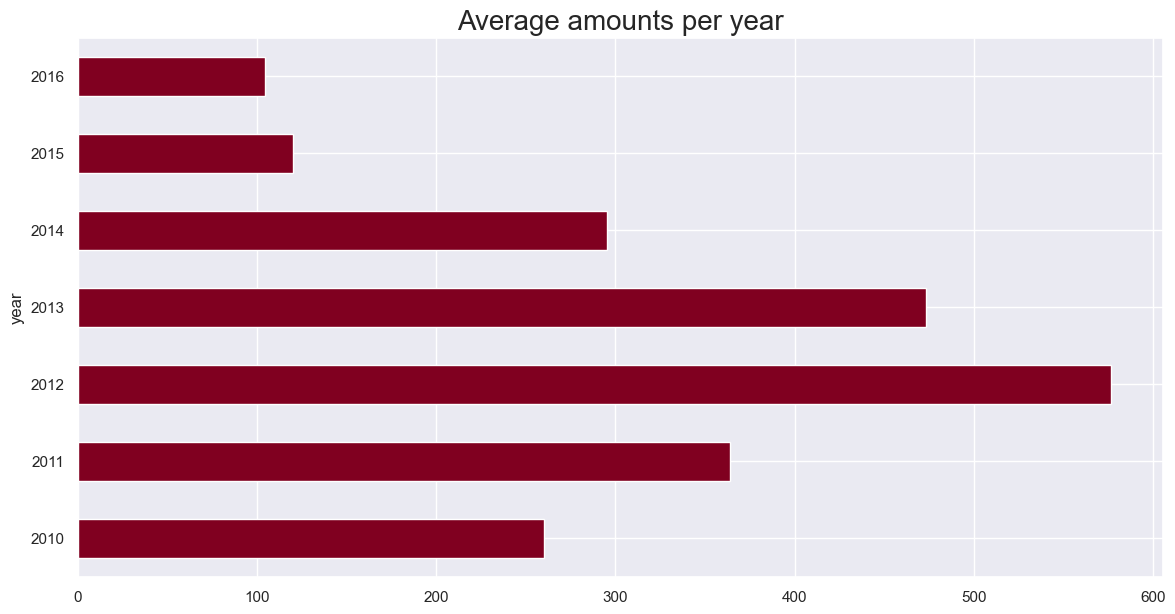

In [66]:
# Create chart
averages.plot.barh(
    x='year',
    y='avg_open',
    legend=None,
    color='#800020',
    figsize=(14,7),
)
# Add title
plt.title('Average amounts per year', fontsize=20)
# Show chart
plt.show()

In [ ]:
# Stop the SparkSession
spark.stop()

## Conclusions

`PySpark` is a powerful and versatile tool for working with big data.
Its combination of Spark's distributed computing capabilities and Python's ease of use makes it an excellent choice for data scientists and analysts looking to tackle large-scale data processing tasks.

Whether you're performing complex data transformations, building machine learning models, or analyzing real-time streams, PySpark can help you unlock the potential of your data.
So, dive in, explore its features, and unleash the power of big data!

## References

* [Official PySpark Documentation](https://spark.apache.org/docs/latest/api/python/index.html)
* [Getting Started Guide](https://spark.apache.org/docs/latest/api/python/getting_started/index.html)
* [Tutorials & Examples](https://spark.apache.org/docs/latest/api/python/getting_started/install.html)

## Contact

**Jesus L. Monroy**
<br>
*Economist & Data Scientist*

[Medium](https://medium.com/@jesuslm) | [Linkedin](https://www.linkedin.com/in/j3sus-lm) | [Twitter](https://x.com/j3suslm)